In [2]:
###importing the required packages
import pandas as pd
import numpy as np
import tensorflow as tf


In [3]:
df = pd.read_csv("train.csv")

In [8]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [9]:
df["ADDRESS"].nunique()

6899

In [10]:
df_new = df.drop("ADDRESS", axis = 1)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   LONGITUDE              29451 non-null  float64
 9   LATITUDE               29451 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.5+ MB


In [13]:
df["TARGET(PRICE_IN_LACS)"].describe()

count    29451.000000
mean       142.898746
std        656.880713
min          0.250000
25%         38.000000
50%         62.000000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [19]:
df["BHK_OR_RK"].value_counts()

BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64

In [17]:
mapping = {"Dealer" : 0 , "Owner" : 1 , "Builder" : 2}
df["POSTED_BY_EN"] = df["POSTED_BY"].replace(mapping)

In [23]:
mapping_BHK_OR_RK = {"BHK" : 0, "RK" : 1}
df["BHK_OR_RK_EN"] = df["BHK_OR_RK"].replace(mapping_BHK_OR_RK)

In [24]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_EN,BHK_OR_RK_EN
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,1,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,1,0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,1,0
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,1,0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,1,0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,0,0
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,1,0


In [25]:
df_final = df.select_dtypes(include = ["int64","float64"])

In [26]:
df_final

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_EN,BHK_OR_RK_EN
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,1,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,1,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,1,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,1,0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,1,0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,0,0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,1,0


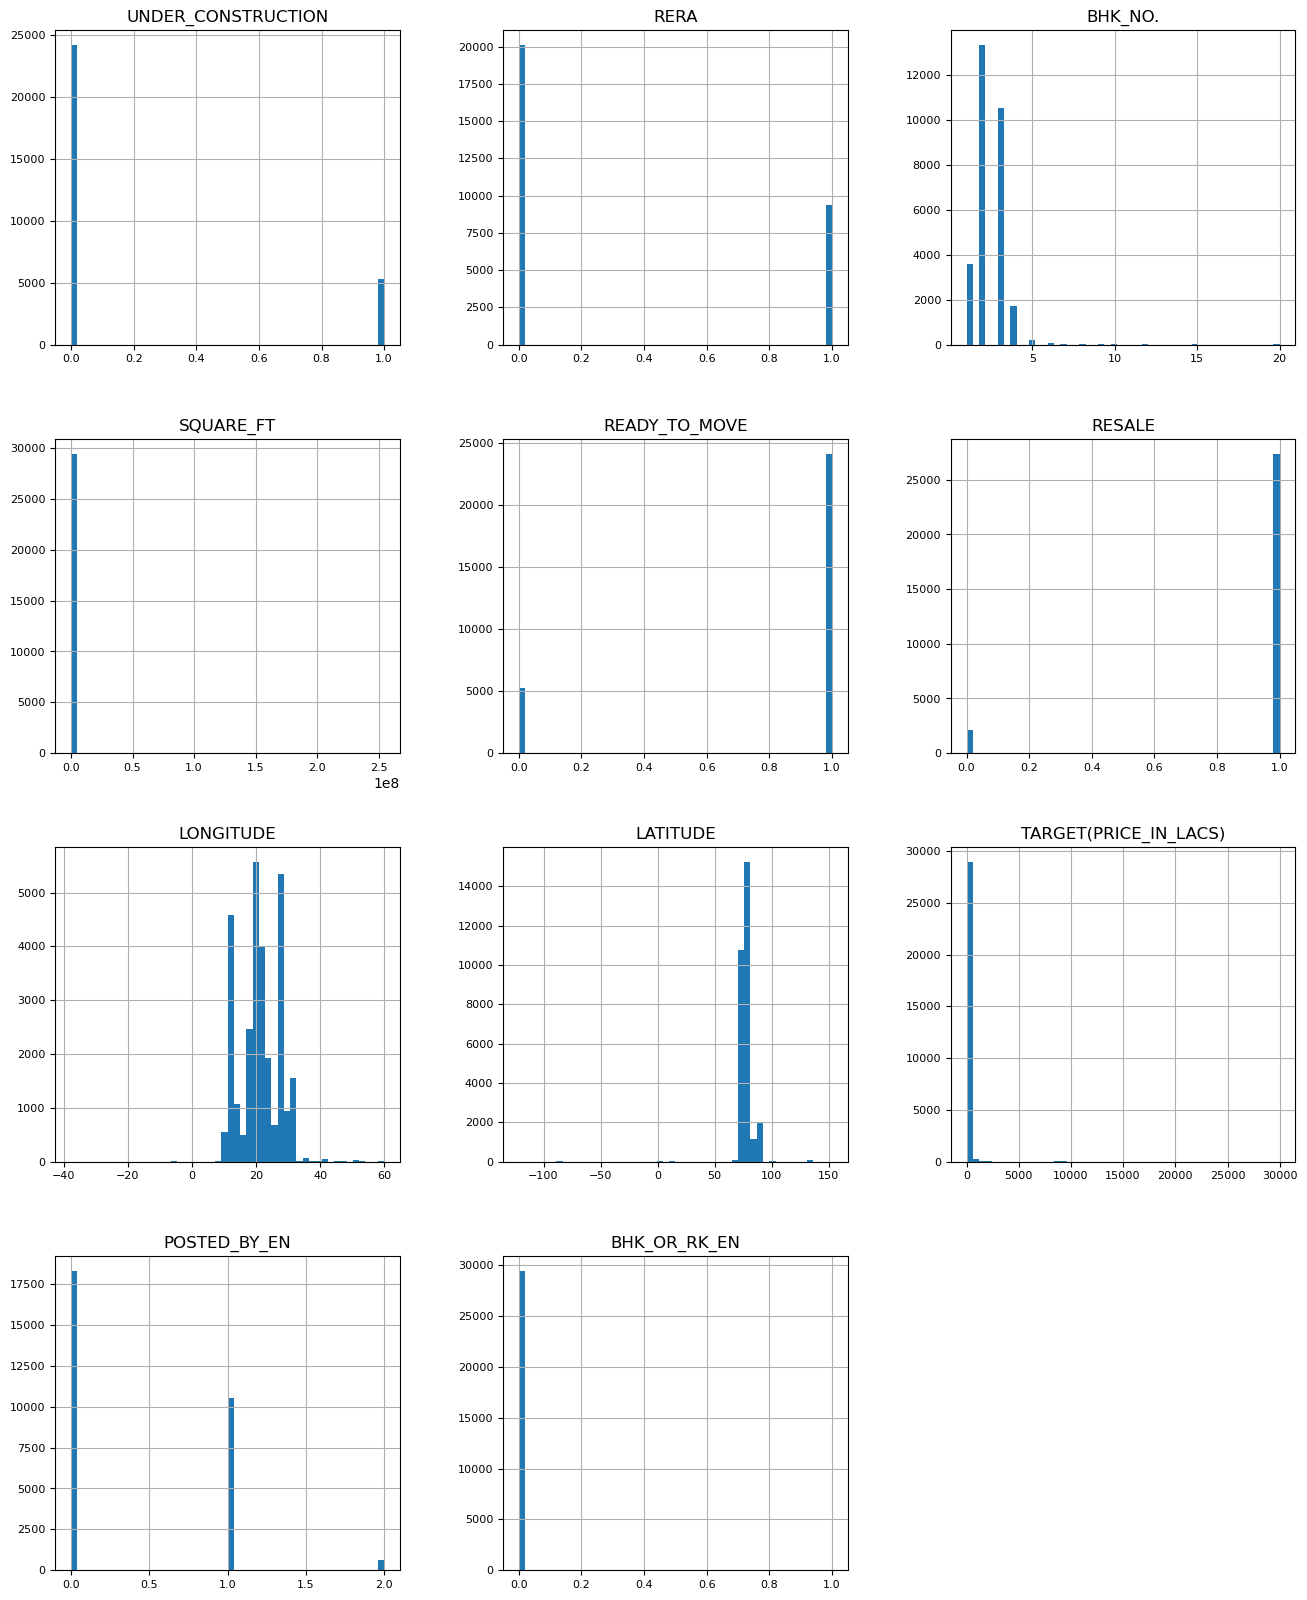

In [28]:
df_final.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [32]:
X = df_final.drop("TARGET(PRICE_IN_LACS)",axis = 1)
y = df_final["TARGET(PRICE_IN_LACS)"]

In [110]:
X,y

(       UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  READY_TO_MOVE  RESALE  \
 0                       0     0        2  1300.236407              1       1   
 1                       0     0        2  1275.000000              1       1   
 2                       0     0        2   933.159722              1       1   
 3                       0     1        2   929.921143              1       1   
 4                       1     0        2   999.009247              0       1   
 ...                   ...   ...      ...          ...            ...     ...   
 29446                   0     0        3  2500.000000              1       1   
 29447                   0     0        2   769.230769              1       1   
 29448                   0     0        2  1022.641509              1       1   
 29449                   0     0        2   927.079009              1       1   
 29450                   0     1        2   896.774194              1       1   
 
        LONGITUDE   LATITU

In [37]:
import sklearn

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
len(X_train) == len(y_train)

True

In [99]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu" ),
    tf.keras.layers.Dense(10, activation = "relu" ),
    tf.keras.layers.Dense(10, activation = "relu" ),
    tf.keras.layers.Dense(1)
])

In [100]:
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001))

In [101]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
691/691 [==============================] - 2s 2ms/step - loss: 216.8073
Epoch 2/100
691/691 [==============================] - 3s 4ms/step - loss: 272.6727
Epoch 3/100
691/691 [==============================] - 2s 3ms/step - loss: 736.3761
Epoch 4/100
691/691 [==============================] - 2s 3ms/step - loss: 543.1960
Epoch 5/100
691/691 [==============================] - 2s 3ms/step - loss: 479.9358
Epoch 6/100
691/691 [==============================] - 2s 3ms/step - loss: 373.5305
Epoch 7/100
691/691 [==============================] - 2s 3ms/step - loss: 274.7714
Epoch 8/100
691/691 [==============================] - 2s 3ms/step - loss: 154.4832
Epoch 9/100
691/691 [==============================] - 2s 2ms/step - loss: 174.8545
Epoch 10/100
691/691 [==============================] - 2s 2ms/step - loss: 212.2095
Epoch 11/100
691/691 [==============================] - 2s 2ms/step - loss: 168.9852
Epoch 12/100
691/691 [==============================] - 2s 3ms/step - loss

691/691 [==============================] - 2s 2ms/step - loss: 92.5494
Epoch 99/100
691/691 [==============================] - 2s 2ms/step - loss: 94.4202
Epoch 100/100
691/691 [==============================] - 2s 2ms/step - loss: 151.4516


In [102]:
predictions = model.predict([X_test])

231/231 [==============================] - 0s 2ms/step


In [56]:
import matplotlib.pyplot as plt

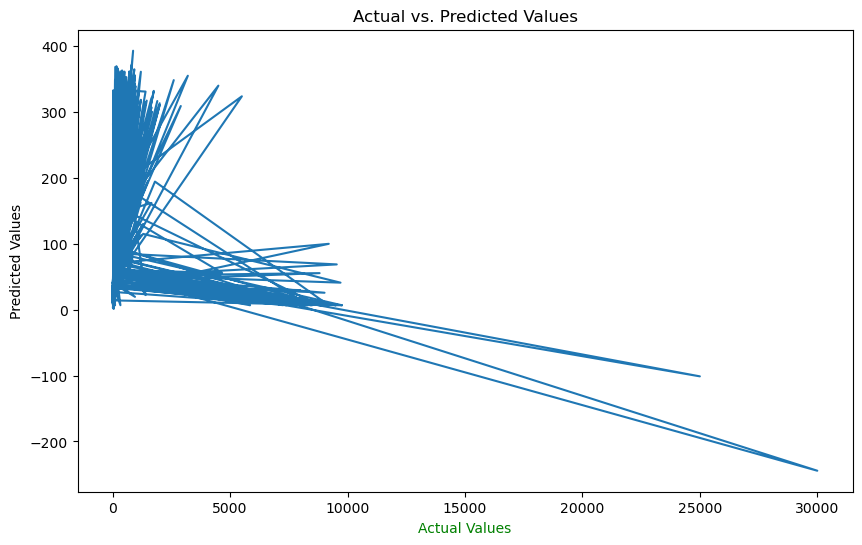

In [103]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, predictions)
plt.xlabel('Actual Values',color ="g")
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [111]:
predictions


array([[61.432583],
       [58.13473 ],
       [37.948055],
       ...,
       [80.499985],
       [65.343155],
       [42.985523]], dtype=float32)

In [105]:
X_train.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'POSTED_BY_EN', 'BHK_OR_RK_EN'],
      dtype='object')

In [106]:
predictions

array([[61.432583],
       [58.13473 ],
       [37.948055],
       ...,
       [80.499985],
       [65.343155],
       [42.985523]], dtype=float32)

In [109]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error on Test Set:", mae)

Mean Absolute Error on Test Set: 84.239714534827


X_train.shape